# Import 

In [3]:
# 의류 데이터 분류하는 모델 만들어보기 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf # 텐서플로우 import 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt


# 데이터 불러오기 & 전처리

In [7]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # 데이터 불러오기. 튜플로 묶어서 반환

# 훈련 세트와 검증 세트로 분류. train_test_split() 사용
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42) # random_state는 안해도 되는데 예제랑 같다는 걸 보여주기 위해 사용한 것. 20%(test_size = 0.2)를 검증 세트로 나눈다.

# 입력 데이터 정규화. 0~1사이 값으로 나타내기 위해 255로 나눠줌 
x_train = x_train / 255
x_val = x_val / 255

# 28*28를 784(28*28하면 나오는거)로 변경. 왜냐하면 내가 설계한 모델은 1차원 배열을 요구하기 때문.
#한 줄로 쫙 이어붙혔다고 보면 된다.
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1,784)

# 정답 데이터들을 원-핫 인코딩 처리
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

## 케라스로 다중 분류 신경망 제작

In [11]:
model = Sequential() # 모델 생성

In [12]:
# 은닉층, 출력층을 모델에 추가
model.add(Dense(100, activation = 'sigmoid', input_shape = (784, ))) # 첫번 째 은닉층은 imput_shape에 입력 데이터 크기 지정. 784 = 28*28를 일렬로 나열한 것. 활성화 함수로 sigmoid
model.add(Dense(10, activation = 'softmax')) # 출력층. 활성화 함수로 softmax사용. 

In [15]:
# compile함수로 최적화 알고리즘과 손실 함수 지정. 
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # metrics = 훈련 과정 기록(accuracy를 사용해 정확도 체크)

In [16]:
# 모델 훈련하기. validation_data에 검증 세트를 튜플로 전달.
# metrics를 따로 지정하지 않을 경우, fit()의 반환값인 history 객체에 기본값으로 손실이 기록
history = model.fit(x_train, y_train_encoded, epochs=40, validation_data=(x_val, y_val_encoded)) 

Epoch 1/40
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7857 - accuracy: 0.5109 - val_loss: 0.9847 - val_accuracy: 0.7337
Epoch 2/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9085 - accuracy: 0.7396 - val_loss: 0.7573 - val_accuracy: 0.7642
Epoch 3/40
1500/1500 [==============================] - 1s 990us/step - loss: 0.7407 - accuracy: 0.7612 - val_loss: 0.6653 - val_accuracy: 0.7797
Epoch 4/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6563 - accuracy: 0.7793 - val_loss: 0.6121 - val_accuracy: 0.7952
Epoch 5/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6111 - accuracy: 0.7936 - val_loss: 0.5768 - val_accuracy: 0.8040
Epoch 6/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5832 - accuracy: 0.8016 - val_loss: 0.5508 - val_accuracy: 0.8102
Epoch 7/40
1500/1500 [==============================] - 1s 962us/step - loss: 0.5631 - accuracy: 0.8063 - val_loss: 0.5297 - val_accur

## 손실과 정확도 그래프 그리기

In [17]:
print(history.history.keys()) # 히스토리의 키 출력 : 측정 지표들이 뭐가 있는지 알 수 있음.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


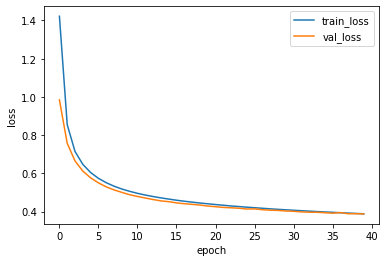

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

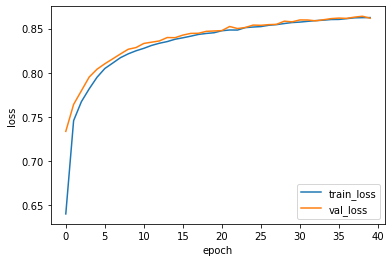

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

## 검증 세트 정확도 계산

In [20]:
# evaluate()로 손실값, metrics에 추가한 측정 지표 계산해서 반환
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(accuracy)

0.8616666793823242


In [ ]:
# 정리
# 객체 초기화 -> 레이어 추가(Dense Layer 추가) -> 학습 방법(Optimizer), 손실 함수(loss) 추가 -> 훈련 -> 평가(는 안해도 되긴 한데 그래도 하는게 좋겠지?)